In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

### 1.1

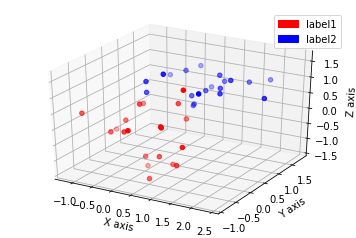

In [2]:
u1 = [0, 0, 0]
covMatrix1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

u2 = [1, 1, 1]
covMatrix2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.1]]

#generate 20 random points from a Gaussian multivariate distribution
x1, y1, z1 = np.random.multivariate_normal(u1, covMatrix1, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2, covMatrix2, 20).T

matrix1 = np.column_stack((x1,y1,z1))
matrix2 = np.column_stack((x2,y2,z2))

#plot the 3D plot of the clouds of data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

### 1.2

We can see that label 2 is offset to the right of label 1. This makes sense since label 2 is centered at a mean, right of label 1. However, the two distributions are hard to distinguish between with some overlap in the middle.


In [3]:
#concatenate all the points
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

### 1.3

In [4]:
#concatenate all the points
x = np.append(x1,x2)
y = np.append(y1,y2)
z = np.append(z1,z2)

matrix = np.column_stack((x,y,z))

#find the covariance matrix:
mean = np.mean(matrix, axis=0)

#find the variances
varX = np.sum(np.square(matrix[:,0]-mean[0]))/len(matrix)
varY = np.sum(np.square(matrix[:,1]-mean[1]))/len(matrix)
varZ = np.sum(np.square(matrix[:,2]-mean[2]))/len(matrix)

#find the covariances
CovXY = np.sum((matrix[:,0]-mean[0]) * (matrix[:,1]-mean[1]))/len(matrix)
CovXZ = np.sum((matrix[:,0]-mean[0]) * (matrix[:,2]-mean[2]))/len(matrix)
CovYZ = np.sum((matrix[:,1]-mean[1]) * (matrix[:,2]-mean[2]))/len(matrix)

#put it all together
coMatrix = np.array([[varX, CovXY, CovXZ], [CovXY, varY, CovYZ], [CovXZ, CovYZ, varZ]])

print ("The covariance matrix is")
print (coMatrix)

The covariance matrix is
[[0.55253251 0.17435947 0.16504095]
 [0.17435947 0.46392657 0.27514899]
 [0.16504095 0.27514899 0.59462109]]


### 1.4

In [5]:
from collections import OrderedDict

#find the eigenvectors of the covariance matrix with the largen eigenvalues

#make a dictionary of eigenvalues and their eigenvectors
dictEig = {}
matEig = np.linalg.eig(coMatrix)

for vec in range(len(matEig[0])):
    dictEig[matEig[0][vec]] = matEig[1][:, vec]
    
#sort dictionary
sortedDict = OrderedDict(sorted(dictEig.items(), key = lambda t: t[0], reverse = True))

#top 2 eigenvectors
e1 = list(sortedDict.values())[0]
e2 = list(sortedDict.values())[1]

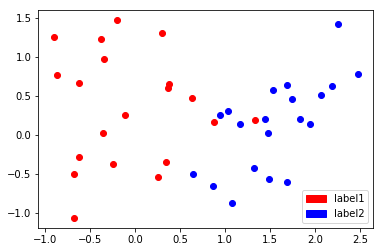

In [6]:
eigenv = np.column_stack((e1.T, e2.T))

#project data onto eigenvectors
proj1 = np.dot(matrix1, eigenv)
proj2 = np.dot(matrix2, eigenv)

newx1 = proj1[:, 0]
newy1 = proj1[:, 1]

newx2 = proj2[:, 0]
newy2 = proj2[:, 1]

#plot the projected points
plt.plot(newx1, newy1, "o", c= 'r')
plt.plot(newx2, newy2, "o", c= 'b')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()


Yes, PCA did make is easier to distinguish the two labels in two dimensions (where label 2 is clearly offset to the right of lablel 1). The variance of the points is clear in the x and y axes with the third dimension gone.

### 2.1

C:\Users\jakho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


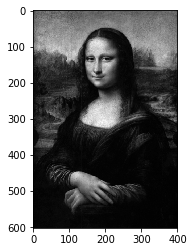

In [7]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import linalg
import numpy as np
%matplotlib inline

monaLisa = imread("mona_lisa.png",flatten = True)
plt.imshow(monaLisa, cmap='gray')
plt.show()

In [8]:
U, S, V = np.linalg.svd(monaLisa, full_matrices = False)

In [21]:
#print('%s %d' % (name, number))

def LRA(k):
    print ("For rank %d" %(k))
    
    #resize U, S, V by the rank
    Ut = U[:, :k]
    St = S[:k]
    Vt = V[:k, :]
    
    #calculate low-rank approximation 
    At = Ut.dot(np.diag(St).dot(Vt))
    plt.imshow(At, cmap='gray')
    
    #calculate number of bits needed
    n = Ut.shape[0]
    p = Vt.shape[1]
    bits = 16 * ( k * (n + p + 1))
    print ("Number of bits needed is %d" %(bits))

For rank 2
Number of bits needed is 32128


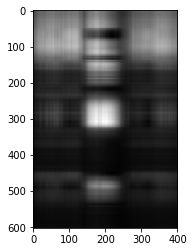

In [23]:
LRA(2)

For rank 5
Number of bits needed is 80320


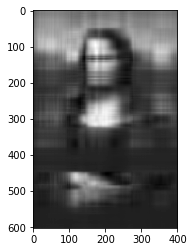

In [24]:
LRA(5)

For rank 10
Number of bits needed is 160640


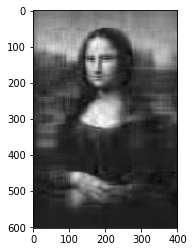

In [25]:
LRA(10)